# Введение в искусственные нейронные сети
# Урок 6. Сегментация

## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть U-Net либо на другом датасете либо с другим бэкбоном (другой свёрточной частью). 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    </li>
    <li>*Попробуйте свои силы в задаче Carvana на Kaggle - https://www.kaggle.com/c/carvana-image-masking-challenge/overview</li>
    <li>*Сделайте свою реализацию U-Net на TensorFlow</li>
</ol>

In [68]:
try:
  # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [69]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt


import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

In [70]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [133]:
builder = tfds.builder('oxford_iiit_pet:3.2.0')

info = builder.info

print(info)

config = tfds.download.DownloadConfig(register_checksums = True)

builder.download_and_prepare(download_config=config)

dataset = builder.as_dataset()

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='C:\\Users\\kto-k\\tensorflow_datasets\\oxford_iiit_pet\\3.2.0',
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
   

In [123]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255
    input_mask -= 1
    return input_image, input_mask

In [139]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

#     if tf.random.uniform(()) > 0.5:
#         input_image = tf.image.flip_left_right(input_image)
#         input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [140]:
def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [141]:
TRAIN_LENGTH = info.splits['train'].num_examples

In [142]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [143]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [144]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [145]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
        plt.show()

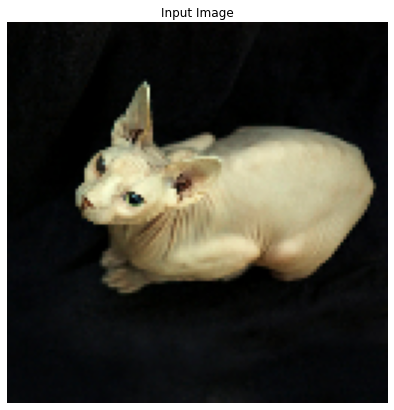

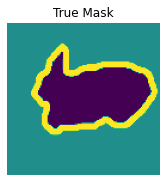

In [146]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])

In [147]:
OUTPUT_CHANNELS = 3

In [148]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64x96
    'block_3_expand_relu',   # 32x32x144
    'block_6_expand_relu',   # 16x16x192
    'block_13_expand_relu',  # 8x8x576
    'block_16_project',      # 4x4x (block_16_project/Conv2D:0' shape=(None, 4, 4, 320))
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9412608/9406464 [==============================] - 1s 0us/step


In [149]:
[layer.output for layer in base_model.layers]

[<KerasTensor: shape=(None, 128, 128, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'Conv1')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'bn_Conv1')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'Conv1_relu')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'expanded_conv_depthwise')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'expanded_conv_depthwise_BN')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'expanded_conv_depthwise_relu')>,
 <KerasTensor: shape=(None, 64, 64, 16) dtype=float32 (created by layer 'expanded_conv_project')>,
 <KerasTensor: shape=(None, 64, 64, 16) dtype=float32 (created by layer 'expanded_conv_project_BN')>,
 <KerasTensor: shape=(None, 64, 64, 96) dtype=float32 (created by layer 'block_1_expand')>,
 <KerasTensor: shape=(None, 64, 64, 96) dtype=float32

In [150]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [151]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling through the model
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [152]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [153]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [155]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [156]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

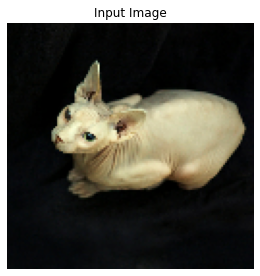

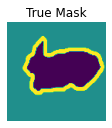

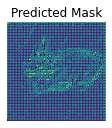

In [157]:
show_predictions()

Сначала обучим исходную модель MobileNetV2 на 10 эпохах

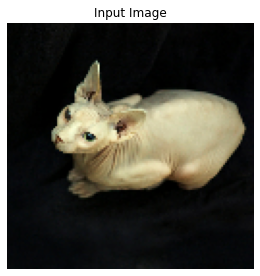

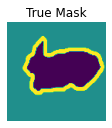

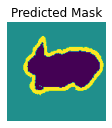


Sample Prediction after epoch 10

Wall time: 23min 41s


In [158]:
%%time
tf.random.set_seed(48)
EPOCHS = 10 # увеличьте при необходимости
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

Теперь рассмотрим предыдущую модификацию MobileNet. Сначала определим слои которые нам нужны

In [159]:
base_model = tf.keras.applications.MobileNet(input_shape=[128, 128, 3], include_top=False)

17227776/17225924 [==============================] - 1s 0us/step


In [160]:
[layer.output for layer in base_model.layers]

[<KerasTensor: shape=(None, 128, 128, 3) dtype=float32 (created by layer 'input_3')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv1_relu')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv_dw_1')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv_dw_1_bn')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv_dw_1_relu')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv_pw_1')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv_pw_1_bn')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv_pw_1_relu')>,
 <KerasTensor: shape=(None, 65, 65, 64) dtype=float32 (created by layer 'conv_pad_2')>,
 <KerasTensor: shape=(None, 32,

In [161]:
base_model = tf.keras.applications.MobileNet(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'conv_pw_1_relu',   # 64x64 (conv_pw_1_relu/Relu6:0' shape=(None, 64, 64, 64))
    'conv_pw_2_relu',   # 32x32 (conv_pw_2_relu/Relu6:0' shape=(None, 32, 32, 128))
    'conv_pw_4_relu',   # 16x16 (conv_pw_4_relu/Relu6:0' shape=(None, 16, 16, 256))
    'conv_pw_6_relu',   # 8x8 (conv_pw_6_relu/Relu6:0' shape=(None, 8, 8, 512))
    'conv_pw_13',       # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

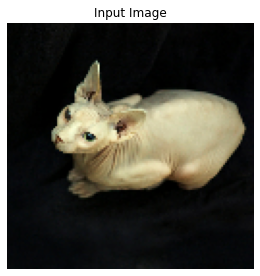

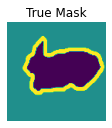

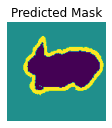

In [162]:
show_predictions()

И точно так же обучим на 10 эпохах

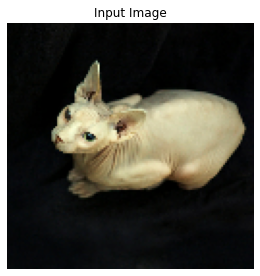

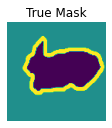

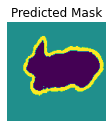


Sample Prediction after epoch 10

Wall time: 23min 34s


In [163]:
%%time
tf.random.set_seed(48)
EPOCHS = 10 # увеличьте при необходимости
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

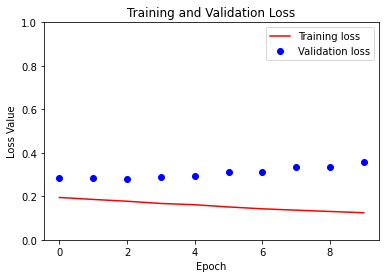

In [164]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

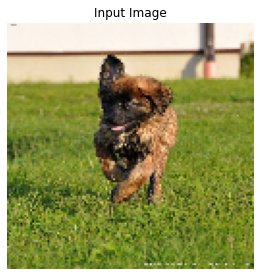

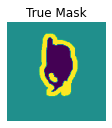

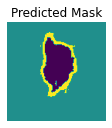

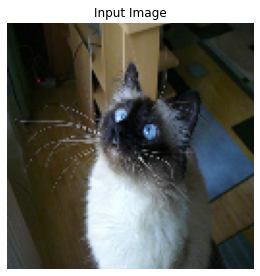

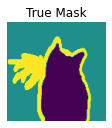

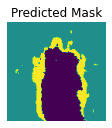

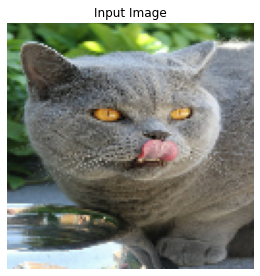

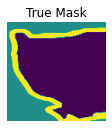

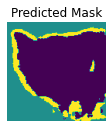

In [165]:
show_predictions(test_dataset, 3)

### Выводы:
В результате сравнения версий MobileNetV2 и MobileNet, выяснилось, что первая версия MobileNet оказалась чуть менее точная чем версия 2. Что вполне ожидаемо.